In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnisttrain_data = pd.read_csv("MNIST_train.csv")
mnisttest_data = pd.read_csv("MNIST_test.csv")

In [3]:
mnisttrain_data.shape

(60000, 787)

In [4]:
mnisttest_data.shape

(10000, 787)

In [5]:
mnisttrain_data

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Ensure the class distribution is not imbalance
mnisttrain_data.labels.value_counts(normalize=True)

labels
1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
Name: proportion, dtype: float64

In [42]:
value_count = mnisttrain_data.labels.value_counts(normalize=True)

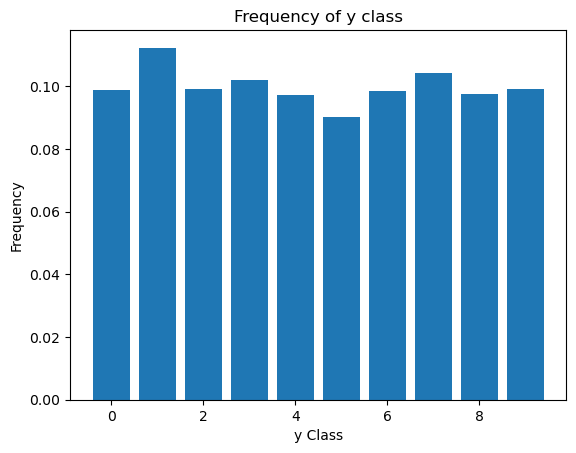

In [43]:
# Create a bar chart
plt.bar(value_count.index, value_count)

# Add labels and title
plt.xlabel('y Class')
plt.ylabel('Frequency')
plt.title('Frequency of y class')

# Show the plot
plt.show()

In [7]:
X=mnisttrain_data.to_numpy()

In [8]:
y=X[:,2]

In [9]:
y

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [10]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [11]:
len(set(y))

10

In [12]:
X=X[:,3:]

In [13]:
#X = np.divide(X,255)

In [14]:
X.shape

(60000, 784)

In [15]:
y.shape

(60000,)

In [16]:
from scipy.stats import multivariate_normal as mvn

In [17]:
class GaussNB():
    def fit(self, X,y,epsilon= 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = set(y.astype(int))

        for k in self.K:
            X_k = X[y==k] 

            #Naive Assumption: Observations are linearly independent of each other
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":X_k.var(axis = 0) + epsilon}
            self.priors[k] = len(X_k)/len(X)

    def predict(self, X):
        N, D = X.shape

        p_hat = np.zeros((N, len(self.K)))

        for k,l in self.likelihoods.items():            
            p_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
        return p_hat.argmax(axis = 1)

In [18]:
gnb = GaussNB()

In [19]:
gnb.fit(X,y)

In [20]:
y_hat = gnb.predict(X)

In [21]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [22]:
accuracy(y,y_hat)

0.5938

In [23]:
Xt = mnisttest_data.to_numpy()

In [24]:
yt=Xt[:,2]

In [25]:
Xt = Xt[:,3:]

In [26]:
#Xt = np.divide(Xt,255)

In [27]:
yt_hat = gnb.predict(Xt)

In [28]:
accuracy(yt,yt_hat)

0.5878

# Gauss Bayes

In [29]:
class GaussBayes():

  def fit(self, X,y,epsilon=1e-3):
    self.likelihoods = dict()
    self.priors = dict()
    self.K=set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      N_k,D = X_k.shape
      mu_k = X_k.mean(axis=0)

      self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+ epsilon*np.identity(D)}
      self.priors[k] = len(X_k)/len(X)

  def predict(self,X):
      N,D = X.shape
      p_hat = np.zeros((N,len(self.K)))

      for k,l in self.likelihoods.items():
        p_hat[:,k] = mvn.logpdf(X,l["mean"], l["cov"]) + np.log(self.priors[k])
      return p_hat.argmax(axis=1)

In [30]:
gaussbayes = GaussBayes()

In [31]:
gaussbayes.fit(X,y, epsilon=0.375)

In [32]:
y_hat_bayes = gaussbayes.predict(X)

In [33]:
accuracy(y,y_hat_bayes)

0.85365

In [34]:
yt_hat_bayes = gaussbayes.predict(Xt)

In [35]:
accuracy(yt,yt_hat_bayes)

0.8266

### Confusion Matrix

In [36]:
import seaborn as sns

Text(0.5, 47.7222222222222, 'Predicted label')

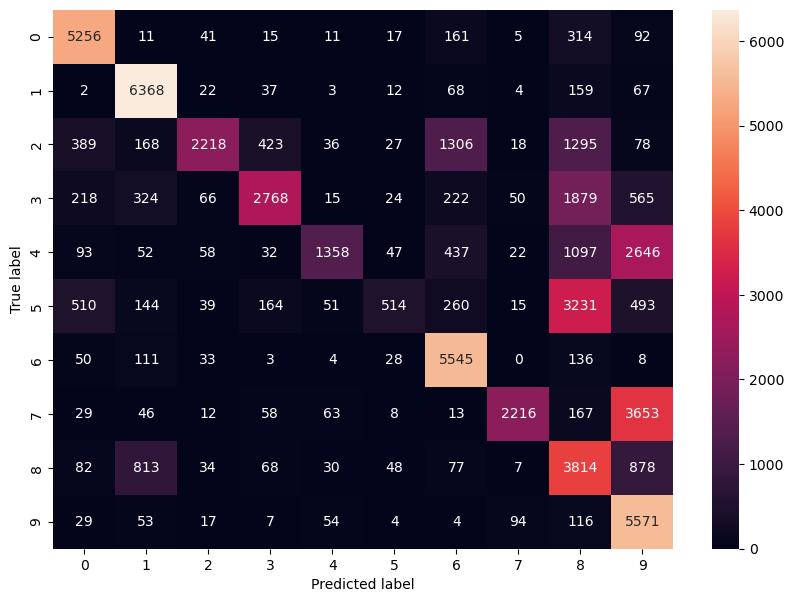

In [37]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')